# Student Performance Analysis using Machine learning

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
np.random.seed(243)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload dataset from local drive
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
# Read dataset using pandas library
df = pd.read_csv('student-mat.csv', sep=';')
# see first file rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Exploratory Data Analysis (EDA)

In [ ]:
# All attributes
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# check if there is any null or missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# categorical type attributes
df[list(df.describe(include=['O']).columns)+['freetime','goout','Walc','Dalc','health']].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,freetime,goout,Walc,Dalc,health
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,3,4,1,1,3
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,3,3,1,1,3
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,3,2,3,2,3
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,2,2,1,1,5
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,3,2,2,1,5


In [ ]:
# regression type attributes
df[['absences','G1','G2','G3']].describe()

,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000
mean,5.708861,10.908861,10.713924,10.415190
std,8.003096,3.319195,3.761505,4.581443
min,0.000000,3.000000,0.000000,0.000000
25%,0.000000,8.000000,9.000000,8.000000
50%,4.000000,11.000000,11.000000,11.000000
75%,8.000000,13.000000,13.000000,14.000000
max,75.000000,19.000000,19.000000,20.000000


## EDA on categorical types attributes

Check no. of samples for each school.

In [ ]:
df[['school','G3']].groupby(['school'], as_index=False).count()

,school,G3
0,GP,349
1,MS,46


So there are 349 samples from GP school and 46 samples from MS school but our aim is to analyse the performance of the students regardless to which school they belong to. 

In [ ]:
# mean marks
print("MEAN:-")
df[['school','G3']].groupby(['school'], as_index=False).mean()

MEAN:-


,school,G3
0,GP,10.489971
1,MS,9.847826


In [ ]:
print("MEDIAN:-")
df[['school','G3']].groupby(['school'], as_index=False).median()

MEDIAN:-


,school,G3
0,GP,11
1,MS,10


In [ ]:
# Maximum marks
df.G3.max()

20

In [ ]:
# Minimum marks
df.G2.min() # 3 is minimum in G1

0

In [ ]:
# plot sample distribution
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


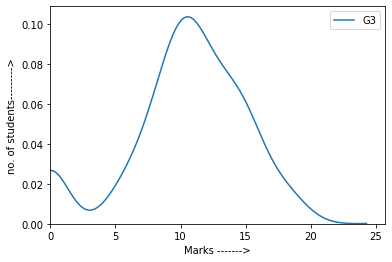

In [ ]:
sns.kdeplot(data=df.G3)
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Marks ------->")
plt.ylabel("no. of students--------->")
plt.show()

Data is almost uniformly distributed

In [ ]:
# Influence of sex on student's performance
df[['sex','G1','G2','G3']].groupby(['sex'], as_index=False).mean().sort_values(by='G3', ascending=False)

,sex,G1,G2,G3
1,M,11.229947,11.074866,10.914439
0,F,10.620192,10.389423,9.966346


In [ ]:
# Influence of family size on student's performance
df[['famsize','G1','G2','G3']].groupby(['famsize'], as_index=False).mean().sort_values(by='G3', ascending=False)

,famsize,G1,G2,G3
1,LE3,11.280702,11.192982,11.000000
0,GT3,10.758007,10.519573,10.177936


Students belonging to family size less than 3 members have slightly better than the students belonging to family size greater than 3 member.
Hence family size has not influenced so much (or almost nothing) on student's performance.

In [ ]:
# Influence of parent's education on student's performance
# Father's Education
df[['Fedu','G1','G2','G3']].groupby(['Fedu'], as_index=True).mean().sort_values(by='G3', ascending=False)


,G1,G2,G3
Fedu,,,
0,12.000000,13.000000,13.000000
4,11.927083,11.562500,11.364583
3,10.740000,10.750000,10.660000
2,11.026087,10.878261,10.260870
1,9.731707,9.390244,9.158537


In [ ]:
# Mother's Education
df[['Medu','G1','G2','G3']].groupby(['Medu'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Medu,,,
0,12.000000,12.666667,13.000000
4,11.908397,11.847328,11.763359
3,10.606061,10.444444,10.303030
2,10.563107,10.359223,9.728155
1,9.745763,9.169492,8.677966


#### Education representation
- 0: none
- 1: primary education(4th grade)
- 2: 5th to 9th grade
- 3: secondary education
- 4: higher education
<br>Here it indicates that student's whose parents having totally no educational background have had more 65% of marks aggregately reason could be that they could be self dependent and laborious whereas students whose parents had education upto 4th grade have had worst performance among all and  reason could be that since they have very less knowlegde so they were unable to guide their children properly or might be unable to provide other means like tuition for  their betterment.

In [ ]:
# Influence of parent's job on student's performance
# Father's occupation
df[['Fjob','G1','G2','G3']].groupby(['Fjob'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Fjob,,,
teacher,12.896552,12.000000,11.965517
health,11.444444,11.388889,11.611111
services,10.828829,10.882883,10.297297
other,10.566820,10.410138,10.193548
at_home,11.700000,10.600000,10.150000


In [ ]:
# Mother's oppucation
df[['Mjob','G1','G2','G3']].groupby(['Mjob'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Mjob,,,
health,12.205882,12.352941,12.147059
teacher,11.534483,11.224138,11.051724
services,11.388350,11.213592,11.019417
other,10.177305,10.177305,9.822695
at_home,10.457627,9.677966,9.152542


This is very obvious that students whose parents occupation is teaching(health also) will have good marks(grades).

In [ ]:
# Parents exist or not
df[['guardian','G1','G2','G3']].groupby(['guardian'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
guardian,,,
father,11.111111,11.155556,10.688889
mother,10.882784,10.677656,10.483516
other,10.562500,9.781250,9.062500


Students whose parents are alive have good grades.

In [ ]:
# Considering travel time
df[['traveltime','G1','G2','G3']].groupby(['traveltime'], as_index=False).mean().sort_values(by='G3', ascending=False) 

,traveltime,G1,G2,G3
0,1,11.097276,11.058366,10.782101
1,2,10.644860,10.336449,9.906542
2,3,10.739130,9.565217,9.260870
3,4,8.875000,8.000000,8.750000


#### Travel time representation
- 1: less than 15 min
- 2: between 15 min to 30 min
- 3: between 30 min to 1 hr
- 4: more than 1 hr
<br> Students who travel less for school have comparatively better grades. 

In [ ]:
# Taking study time as a factor
df[['studytime','G1','G2','G3']].groupby(['studytime'], as_index=False).mean().sort_values(by='G3', ascending=False) 

,studytime,G1,G2,G3
2,3,12.046154,11.507692,11.400000
3,4,11.888889,12.037037,11.259259
1,2,10.651515,10.505051,10.171717
0,1,10.438095,10.276190,10.047619


#### Weekly study time representation
- 1: less than 2 hr
- 2: between 2 hr to 5 hr
- 3: between 5 hr to 10 hr
- 4: more than 10 hr
<br>Here it proves that performance is directly proportional to time spends on study. Students who spends more time on study have good grades.

In [ ]:
# Urban students vs Rural students(R=Rural, U=Urban)
df[['address','G1','G2','G3']].groupby(['address'], as_index=False).mean().sort_values(by='G3', ascending=True)

,address,G1,G2,G3
0,R,10.477273,9.829545,9.511364
1,U,11.032573,10.967427,10.674267


In [ ]:
# Influence of internet on stuent's performance
df[['internet','G1','G2','G3']].groupby(['internet'], as_index=False).mean().sort_values(by='G3', ascending=False)

,internet,G1,G2,G3
1,yes,11.015198,10.914894,10.617021
0,no,10.378788,9.712121,9.409091


Students who surf internet or belong to urbans have comparatively better grade

In [ ]:
# Reason of study
df[['reason','G1','G2','G3']].groupby(['reason'], as_index=False).mean().sort_values(by='G3', ascending=True)

,reason,G1,G2,G3
0,course,10.600000,10.172414,9.820690
1,home,10.816514,10.743119,10.256881
3,reputation,11.457143,11.257143,11.142857
2,other,10.833333,11.222222,11.166667


reason for study is not so affective yet reason as reputation have been considered more.

In [ ]:
# support from school
df[['schoolsup','G1','G2','G3']].groupby(['schoolsup'], as_index=False).mean().sort_values(by='G3', ascending=True)

,schoolsup,G1,G2,G3
1,yes,9.078431,9.568627,9.431373
0,no,11.180233,10.883721,10.561047


In [ ]:
# Support from family
df[['famsup','G1','G2','G3']].groupby(['famsup'], as_index=False).mean().sort_values(by='G3', ascending=True)

,famsup,G1,G2,G3
1,yes,10.685950,10.537190,10.272727
0,no,11.261438,10.993464,10.640523


Support from school have not affected the student's performance (making it worse ) and it seem family's support did the same thing.

In [ ]:
# Involving in different activities
df[['activities','G1','G2','G3']].groupby(['activities'], as_index=False).mean().sort_values(by='G3', ascending=True)

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


In [ ]:
# Involving in love affairs
df[['romantic','G1','G2','G3']].groupby(['romantic'], as_index=False).mean().sort_values(by='G3', ascending=True)

,romantic,G1,G2,G3
1,yes,10.734848,10.121212,9.575758
0,no,10.996198,11.011407,10.836502


It seems that students involving in different activities other have slighly better marks but involving in love affair makes the student's performace worse.

In [ ]:
# Consequences of comsuming alcohol
## Daily
df[['Dalc','G1','G2','G3']].groupby(['Dalc'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Dalc,,,
1,11.155797,10.949275,10.731884
5,10.444444,10.777778,10.666667
3,10.576923,10.538462,10.500000
4,9.777778,9.777778,9.888889
2,10.306667,10.013333,9.253333


In [ ]:
# Alcohol consumtion(Weekly)
df[['Walc','G1','G2','G3']].groupby(['Walc'], as_index=True).mean().sort_values(by='G3', ascending=False)

,G1,G2,G3
Walc,,,
1,11.178808,11.052980,10.735099
3,10.937500,10.912500,10.725000
5,9.964286,10.357143,10.142857
2,11.270588,10.611765,10.082353
4,9.980392,9.764706,9.686275


#### Alcohol Numeric Representation
(numeric: from 1 – very low to 5 –very high) <br>
Students who comsume less or no alcohols have better grades.

## EDA on regression type attributes

In [ ]:
# Checking correlation and multicolinearity
corr_matrix = df[['absences','G1','G2','G3']].corr()
corr_matrix

,absences,G1,G2,G3
absences,1.000000,-0.031003,-0.031777,0.034247
G1,-0.031003,1.000000,0.852118,0.801468
G2,-0.031777,0.852118,1.000000,0.904868
G3,0.034247,0.801468,0.904868,1.000000


In [ ]:
corr_matrix.unstack().sort_values().drop_duplicates()

absences  G2         -0.031777
          G1         -0.031003
          G3          0.034247
G1        G3          0.801468
          G2          0.852118
G2        G3          0.904868
absences  absences    1.000000
dtype: float64

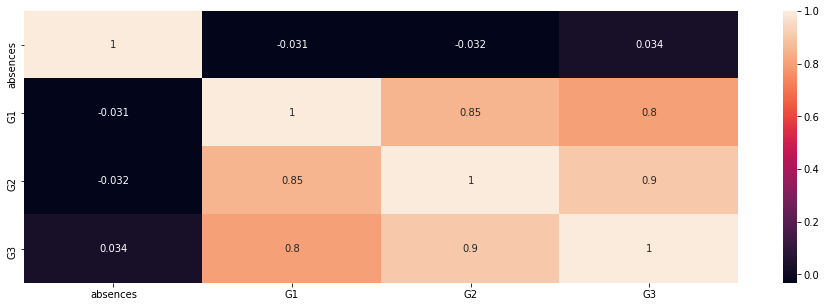

In [ ]:
# Observation in heatmap
import seaborn as sns
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

G1 and G2 are highly correlated with G3 whereas absences attribute is not influencing G3.

#### Summary of EDA
|  Factors | performace improved  |
|---|---|
|Family size   | if less than 3 members   |
|Parent's education | if no educational background   |
| Parent's occupation  | if in medical or teaching line   |
|  Parent's alive | yes   |
| Travel time  | if less time taken  |
| Study time | if more time spend  |
| Area  | Urban students are better  |
| Internet   | if used for study  |
| Reason of study   | not affective  |
|  School's support | not affective  |
| Family's support  | not affective  |
|  Activities | should participate  |
|  Romantic(love affair) | worse the performace  |
| workday(daily) alcohol consumption   | improved if less or no comsption  |
| weekly alcohol consumption   | improved if less or no comsption  |
| Absenses  | not affective  |


<small><bold>Note:</bold> Performace has also been analysed on the basis of Gender and has been found that Boys are better</small>

## Machine Learning Modeling
Now grades will be modelled using three different approaches:- <br>
1. Binary Classification(G3>=10->pass and G3<10-> fail)
2. Five-level Classification (Eramus Grade conversion system)
3. Regression (G3, predictive value)

### Binary Classification
In this Model, students who got G3>=10 will be considered as pass and students who got G3<10 will be considered as fail.

In [ ]:
# Adding one more column for binary classification(0= fail, 1=pass)
bc = pd.DataFrame({'BC':df['G3'].apply(lambda x: 0 if x<10 else 1)})
print(bc.head())

   BC
0   0
1   0
2   1
3   1
4   1


In [ ]:
df_bc = df.join(bc)
df_bc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,BC
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


In [ ]:
df_bc['BC'].value_counts()

1    265
0    130
Name: BC, dtype: int64

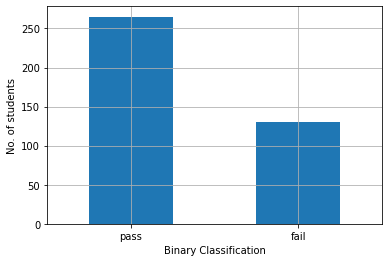

In [ ]:
df_bc['BC'].value_counts().plot.bar()
plt.grid(True)
plt.xlabel("Binary Classification")
plt.ylabel("No. of students")
plt.xticks([]) # Disable xticks
loc, labels = plt.xticks() # Get the current locations and labels
plt.xticks(np.arange(2),['pass','fail'], rotation=0)
plt.show()

Out of 395, 130 students failed in achieving atleat 10.0 in G3.Now the interest of investigation is what would have been the reason/habit of such students who failed as compared to the students who have gotten very good grades(will be analysed later). For this comparison it is needed to go forward for Five level classification where it can be found the number of excellent students(16<=G3<=20) and can be observed their habits with respect to failed students.

### Five Level classification
Students have been classified as follows:- <br>
if a student got x out of 20 where 0<=x<=20 <br>
then, <br>
x>=0 and x<=9 -> Fail <br>
x==10 or x==11 -> Sufficient <br>
x==12 or x==13 -> Satisfoctory <br>
x==14 or x==15 -> Good <br>
16<=x<=20 -> Excellent/Very Good <br>


In [ ]:
# function that will classify the grades in 5 levels
def five_level_cls(x):
  if x>=0 and x<=9:
    return 5 # Fail
  elif x==10 or x==11:
    return 4 # Sufficient
  elif x==12 or x==13:
    return 3 # Satisfoctry
  elif x==14 or x==15:
    return 2 # Good
  else:
    return 1 # Excellent

# Adding column for five level classification
df_flc = df_bc.join(pd.DataFrame({'FLC':df['G3'].apply(five_level_cls)}))
df_flc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,BC,FLC
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,4
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1,4


In [ ]:
# No. of students in each level
df_flc['FLC'].value_counts()

5    130
4    103
3     62
2     60
1     40
Name: FLC, dtype: int64

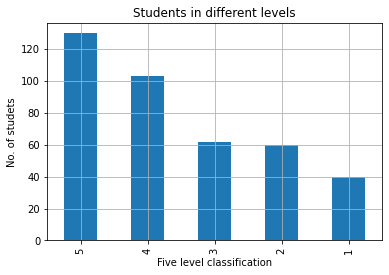

In [ ]:
plt.title("Students in different levels")
df_flc['FLC'].value_counts().plot.bar()
plt.grid(True)
plt.xlabel("Five level classification")
plt.ylabel("No. of studets")
plt.show()

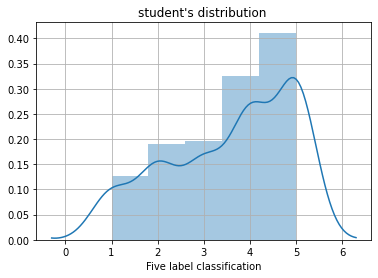

In [ ]:
plt.title("student's distribution ")
sns.distplot(a=df_flc.FLC,)
plt.grid(True)
plt.xlabel("Five label classification")
plt.show()

In 5-Level Classification, 40 students are found to be excellent out of 395 students, 60 students have gotten grades 15 or 14, 62 students have gotten either 13 or 12, 103 students have just passed the exam with grades 10 or 11 whereas 130 students have gotten less than 10 and thus have been considered as failed students.

## Regression Modelling (Predictive G3)
Before fitting the model, some preprocessing is needed to be done like transforming textual data into numerical data, normalization(mean=0, std dev.=1), etc. <br>
<b><i>Since, it has been suspected that G1 and G2 has a great impact on G3 so three different input configurations should be made for predicting G3 as follows:-</i></b> <br>
1. <b>A:</b> with all input dependent variables execept G3(dependent variable), 
2. <b>B:</b> with similar to <b>A</b> but without G2; and 
3. <b>C:</b> with similar to <b>B</b> but with G1.

## Data Preprocessing

In [ ]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


Here I am going to use two pipelines one for categorical transformation and another is for numerical transformation.

In [ ]:
# For categorical transformation
categorical_transform = Pipeline(steps=[
                                        ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                        ('le',OneHotEncoder())
])

# For numeric transformation
numeric_transform = Pipeline(steps=[
                                    ('imputer',SimpleImputer(strategy='median')),
                                    ('scaler',StandardScaler())
])


In [ ]:
# Selecting numeric features
numeric_features = df.select_dtypes(include=['int64']).columns
# Selecting categorical features
categorical_features = df.select_dtypes(include=['O']).columns

In [ ]:
# preprocessor = ColumnTransformer(transformers=[
#                                                ('num',numeric_transform,numeric_features),
#                                                ('cat',categorical_transform,categorical_features)
# ])

## Model Selection

In [ ]:
# Try with different Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
!pip install catboost xgboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score

models = [
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GradientBoostingRegressor(),
          CatBoostRegressor(),
          XGBRegressor()
]

np.random.seed(243)

     |████████████████████████████████| 64.8MB 60kB/s 


In [ ]:
for i in range(1,4):
  X,Y = df.iloc[:,:-i], df.iloc[:,-1]
  print(X.shape,Y.shape)
  
  # Selecting numeric features
  numeric_features = X.select_dtypes(include=['int64']).columns
  # Selecting categorical features
  categorical_features = X.select_dtypes(include=['O']).columns
  # For each input configuration

  # Now we use the ColumnTransformer to apply the transformation to the correct columns in the dataframe.
  preprocessor = ColumnTransformer(transformers=[
                                               ('num',numeric_transform,numeric_features),
                                               ('cat',categorical_transform,categorical_features)
  ])

  X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=.2)

  for i in models:
    pipe = Pipeline(steps=[
                          ('preprocess',preprocessor),
                          ('regressor',i),
                          
    ])
    pipe.fit(X_train,Y_train)
    print(i)
    print("Training score: %.3f" % pipe.score(X_train,Y_train))
    print("Testing score: %.3f" % pipe.score(X_test,Y_test))

(395, 32) (395,)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Training score: 0.982
Testing score: 0.811
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
Training score: 0.931
Testing score: 0.776
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0

## Citetion Request
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[<a href="http://www3.dsi.uminho.pt/pcortez/student.pdf">Web Link</a>]